In [1]:
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
df_grouped = pd.read_csv("grouped_songs_dataset.csv")

df.head()

,rank,date,artist,title,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature
0,1,2017-01-01,Migos,Bad and Boujee (feat. Lil Uzi Vert),1371493,0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,343150.0,4.0
1,2,2017-01-01,Drake,Fake Love,1180074,0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,0.176,0.613,134.007,spotify:track:343YBumqHu19cGoGARUTsd,210937.0,4.0
2,3,2017-01-01,The Weeknd,Starboy,1064351,0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,0.137,0.486,186.003,spotify:track:7MXVkk9YMctZqd1Srtv4MB,230453.0,4.0
3,4,2017-01-01,The Chainsmokers,Closer,1010492,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,244960.0,4.0
4,5,2017-01-01,Rae Sremmurd,Black Beatles,874289,0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,0.128,0.355,145.926,spotify:track:6fujklziTHa8uoM5OQSfIo,291893.0,4.0


In [13]:
CONST_COLS = ['artist', 'title', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'uri',
       'duration_ms', 'time_signature']

df_grp_songs = df[CONST_COLS].copy().drop_duplicates(subset = 'uri').reset_index(drop = True)

gb = df.groupby('uri').agg({ 'uri':'count', 'rank':['mean', 'max', 'min', 'median'], 
                            'streams':['mean', 'max', 'min', 'median','sum'], 'date':['first', 'last']})

gb.columns = [x[0] + "_" + x[1] for x in gb.columns]

df_grp_songs = df_grp_songs.join(gb, on = 'uri').rename(columns = {'uri_count':'ndays', 'rank_max':'lowest_rank', 'rank_min':'highest_rank', 'date_first':'first_date', 'date_last':'last_date'})

In [4]:
df_corr = df_grp_songs.copy()
df_corr = df_corr.drop(["artist", "title", "uri", "rank_mean", "lowest_rank", "highest_rank",
                        "rank_median", 'streams_mean', 'streams_max', 'streams_min', 'streams_median',
                        'first_date','last_date'], axis = 1).corr()

df_corr.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,ndays,streams_sum
danceability,1.000000,0.035781,-0.010020,0.163691,-0.048232,0.204868,-0.273502,-0.124957,-0.101976,0.227237,0.029914,-0.140303,0.150025,0.099116,0.102414
energy,0.035781,1.000000,0.009768,0.731644,-0.040959,0.002970,-0.534595,-0.058074,0.144922,0.354170,0.101018,0.079986,0.115219,-0.036598,-0.037885
key,-0.010020,0.009768,1.000000,-0.003265,-0.185339,0.019272,0.034581,-0.016152,0.014331,0.053392,-0.002079,0.018672,-0.009015,0.022475,0.016503
loudness,0.163691,0.731644,-0.003265,1.000000,-0.041442,-0.067254,-0.479627,-0.156571,0.055633,0.226196,0.086590,0.052727,0.112532,0.029734,0.027567
mode,-0.048232,-0.040959,-0.185339,-0.041442,1.000000,-0.055584,0.017963,-0.003544,0.010141,-0.012180,0.017276,0.013827,-0.011656,-0.011194,-0.016416


In [5]:
names = []
corrs = []
for i in range(len(df_corr)):
    for j in range(len(df_corr)):
        if (abs(df_corr.iloc[i][j]) > 0.4) & (i != j):
            names.append ((df_corr).columns.values[j])
            corrs.append (df_corr.iloc[i][j])
print (names)
print (corrs)

correlation_paris = {"loudness, energy": 0.73164402132745, "acousticness, energy" : -0.5345948723124474, 
                    "acousticness, loudness": -0.47962744268086793, "streams_sum, ndays": 0.9379703660185013}
correlation_paris

['loudness', 'acousticness', 'energy', 'acousticness', 'energy', 'loudness', 'streams_sum', 'ndays']
[0.73164402132745, -0.5345948723124474, 0.73164402132745, -0.47962744268086793, -0.5345948723124474, -0.47962744268086793, 0.9379703660185013, 0.9379703660185013]


{'loudness, energy': 0.73164402132745,
 'acousticness, energy': -0.5345948723124474,
 'acousticness, loudness': -0.47962744268086793,
 'streams_sum, ndays': 0.9379703660185013}

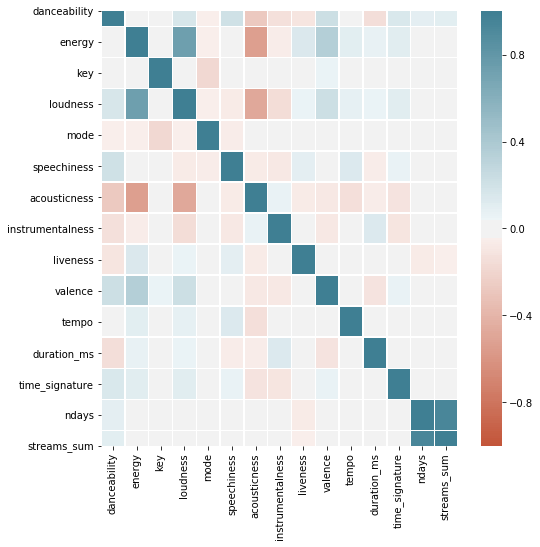

In [6]:
plt.figure(figsize=(8,8))
sn.heatmap(df_corr, cmap = sn.diverging_palette(20, 220, n = 200), vmin = -1, vmax = 1, linewidths = 0.5) # annot = True
plt.show()

In [219]:
new_top = df.iloc[df["streams"].nlargest(20).index]
ind_top = new_top["title"].drop_duplicates().index
top_10 = df.iloc[ind_top]

new_bottom = df.iloc[df["streams"].nsmallest(10).index]
ind_bottom = new_bottom["title"].drop_duplicates().index
bottom_10 = df.iloc[ind_bottom]

top_avg = top_10.mean()[[2, 3, 7, 8, 10, 11]]
bottom_avg = bottom_10.mean()[[2, 3, 7, 8, 10, 11]]

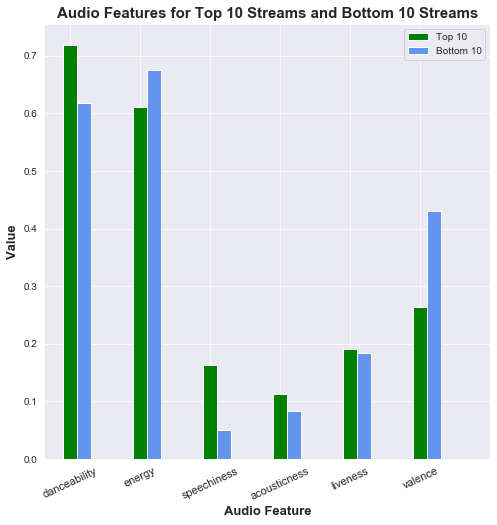

In [184]:
plt.figure(figsize=(8, 8))
sns.set_style("darkgrid")

plt.bar(range(len(top_avg)), top_avg, width = width, label = "Top 10", color = "green")
plt.bar([x + width for x in range(len(top_avg))], bottom_avg, width = width, color = "cornflowerblue", label = "Bottom 10")
plt.legend()
plt.xticks(range(7), ["danceability", "energy", "speechiness", "acousticness", "liveness", "valence"], fontsize = 11, rotation=25)
               
plt.xlabel("Audio Feature", fontsize = 13, fontweight = "bold")
plt.ylabel("Value", fontsize = 13, fontweight = "bold")
plt.title("Audio Features for Top 10 Streams and Bottom 10 Streams", fontsize = 15, fontweight = "bold")
plt.savefig('top_bottom.png')

In [232]:
new_top_days = df_grp_songs.iloc[df_grp_songs["ndays"].nlargest(10).index]
ind_top_days = new_top_days["title"].drop_duplicates().index
top_10_days = df_grp_songs.iloc[ind_top_days]


new_bottom_days = df_grp_songs.iloc[df_grp_songs["ndays"].nsmallest(10).index]
ind_bottom_days = new_bottom_days["title"].drop_duplicates().index
bottom_10_days = df_grp_songs.iloc[ind_bottom]

top_avg_days = top_10_days.mean()[[0, 1, 5, 6, 8, 9]]
bottom_avg_days = bottom_10_days.mean()[[0, 1, 5, 6, 8, 9]]

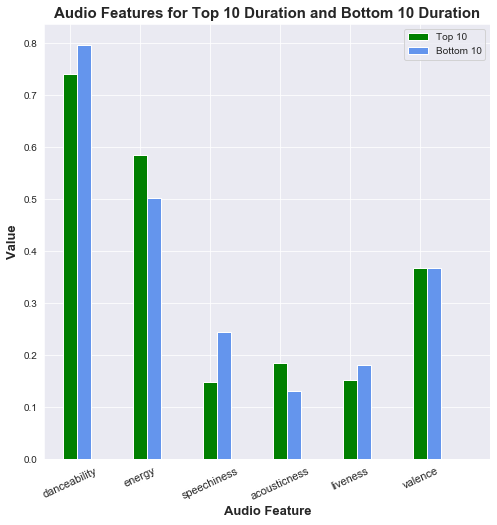

In [231]:
plt.figure(figsize=(8, 8))
sns.set_style("darkgrid")

plt.bar(range(len(top_avg_days)), top_avg_days, width = width, label = "Top 10", color = "green")
plt.bar([x + width for x in range(len(bottom_avg_days))], bottom_avg_days, width = width, color = "cornflowerblue", label = "Bottom 10")
plt.legend()
plt.xticks(range(7), ["danceability", "energy", "speechiness", "acousticness", "liveness", "valence"], fontsize = 11, rotation=25)
               
plt.xlabel("Audio Feature", fontsize = 13, fontweight = "bold")
plt.ylabel("Value", fontsize = 13, fontweight = "bold")
plt.title("Audio Features for Top 10 Duration and Bottom 10 Duration", fontsize = 15, fontweight = "bold")
plt.savefig('top_bottom.png')

Text(0, 0.5, 'Frequency of Durations')

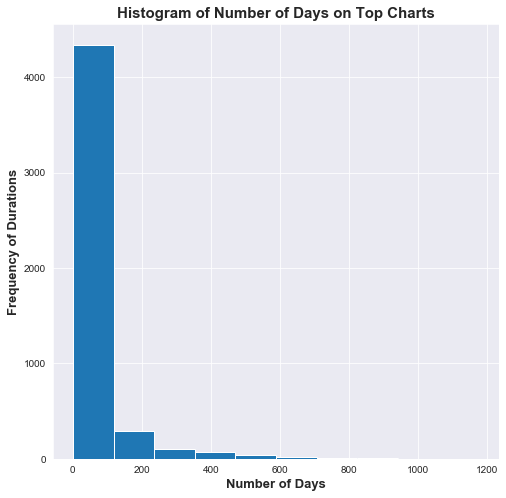

In [194]:
plt.figure(figsize=(8, 8))

plt.hist(df_grp_songs["ndays"])
plt.title("Histogram of Number of Days on Top Charts", fontsize = 15, fontweight = "bold")
plt.xlabel("Number of Days", fontsize = 13, fontweight = "bold")
plt.ylabel("Frequency of Durations", fontsize = 13, fontweight = "bold")

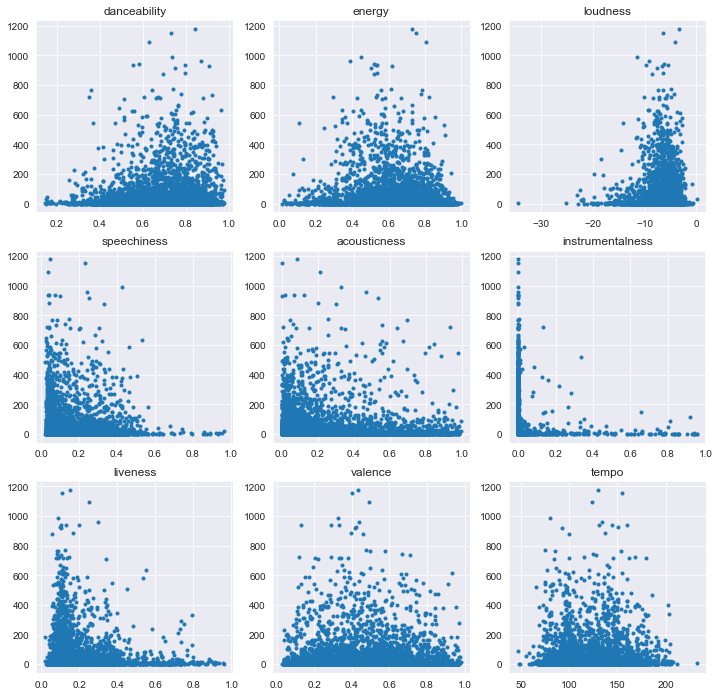

In [188]:
CONT_COLS = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 
             'liveness','valence', 'tempo']

fig, ax = plt.subplots(3,3, figsize = (12,12))
for i, colname in enumerate(CONT_COLS):
    row, col = i//3, i%3
    ax[row,col].plot(df_grp_songs[colname], df_grp_songs['ndays'], '.')
    ax[row,col].set_title(colname)

plt.show()

Text(0, 0.5, 'Frequency of Streams')

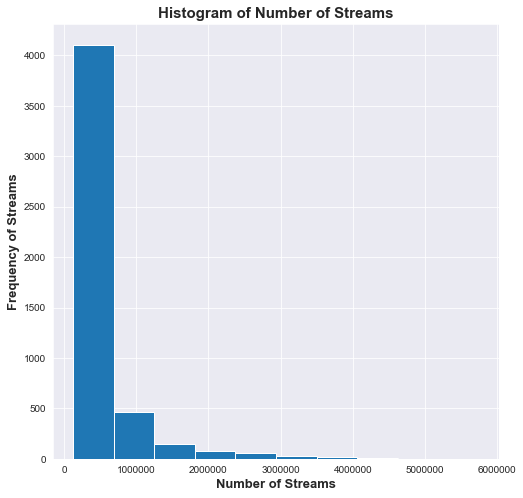

In [247]:
#Same histogram without duplicates
df_col = ['artist','title','streams','uri']
df_no_reps = df[df_col].copy().drop_duplicates(subset = 'uri')

sns.set_style("darkgrid")
plt.figure(figsize=(8, 8))

plt.hist(df_no_reps['streams'])
plt.title('Histogram of Number of Streams', fontsize = 15, fontweight = "bold")
plt.xlabel('Number of Streams', fontsize = 13, fontweight = "bold")
plt.ylabel('Frequency of Streams', fontsize = 13, fontweight = "bold")

In [244]:
round(df_no_reps['streams'].describe(), 2)

count       4900.00
mean      498229.65
std       528756.71
min       122488.00
25%       235684.25
50%       319113.00
75%       515156.00
max      5749019.00
Name: streams, dtype: float64

In [249]:
df_no_reps[df_no_reps["streams"] == 5749019.00]

,artist,title,streams,uri
108184,Drake,Nonstop,5749019,spotify:track:0TlLq3lA83rQOYtrqBqSct
